Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

Просмотр данных

In [ ]:
iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data, columns = iris.feature_names, index = iris.target)
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Построение графиков

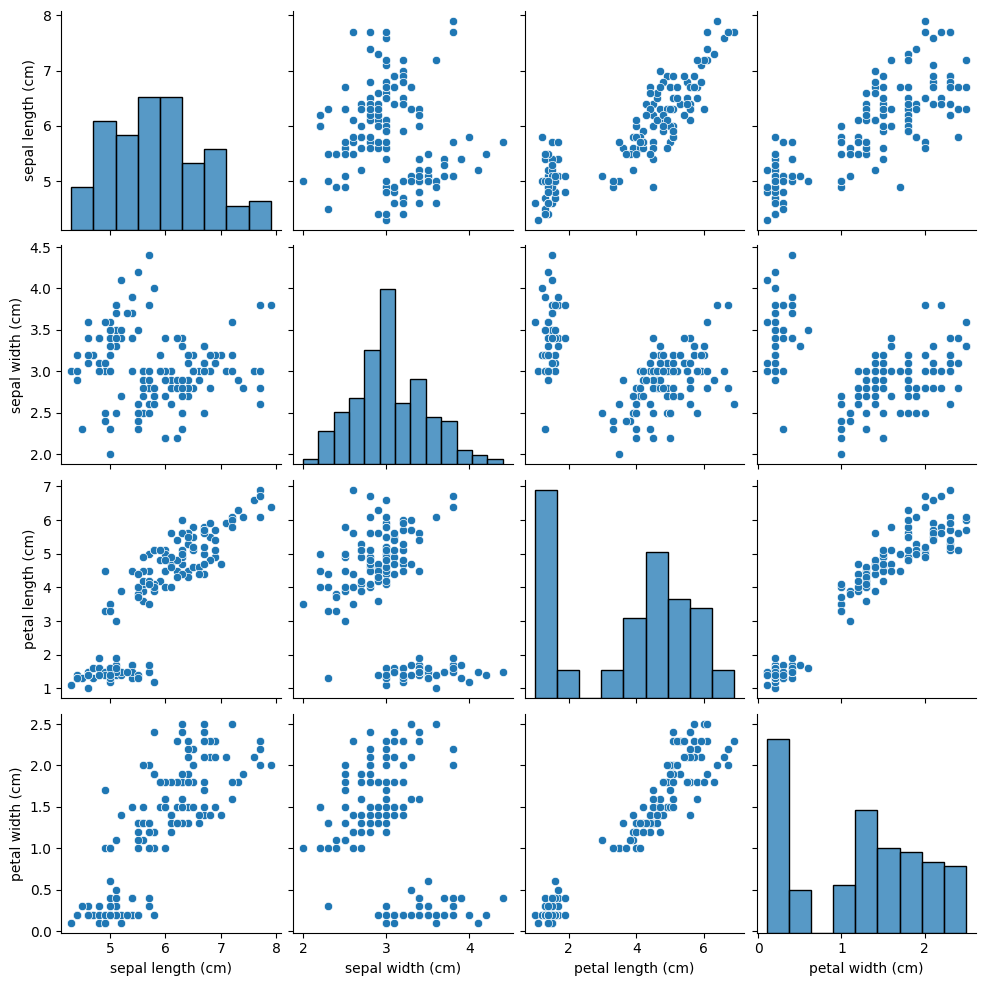

In [ ]:
sns.pairplot(iris_frame)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

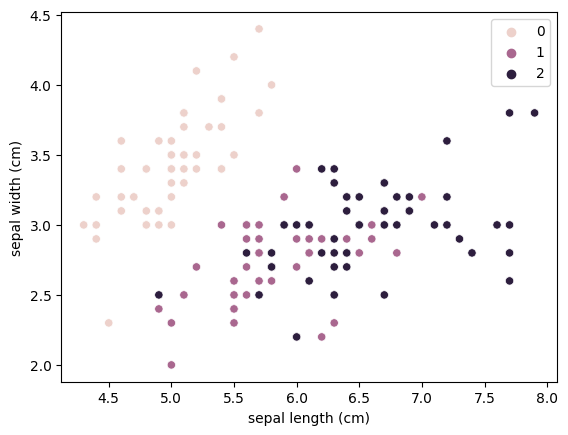

In [ ]:
sns.scatterplot(data = iris_frame, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = iris_frame.index)

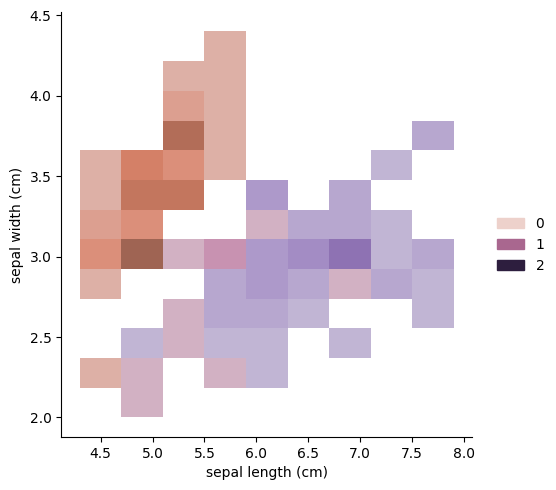

In [ ]:
sns.displot(data = iris_frame, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = iris_frame.index)

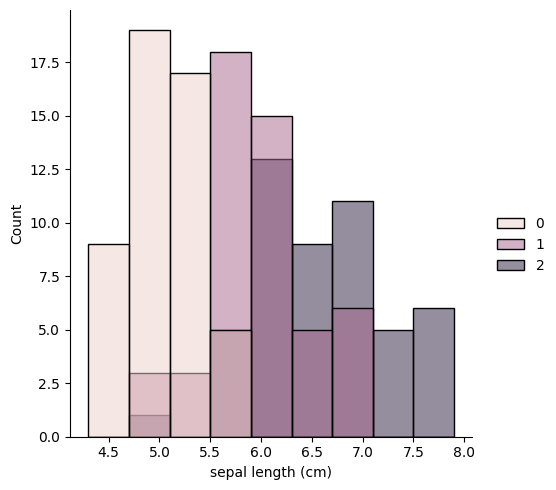

In [ ]:
sns.displot(data = iris_frame, x = 'sepal length (cm)', hue = iris_frame.index)

<ipython-input-8-b9253a16004e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_frame)


<Axes: ylabel='Density'>

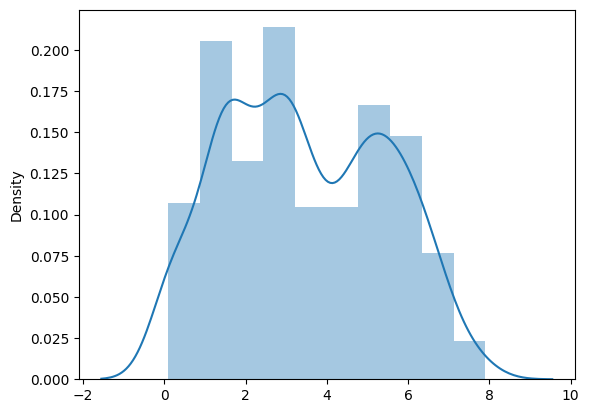

In [ ]:
sns.distplot(iris_frame)

<Axes: >

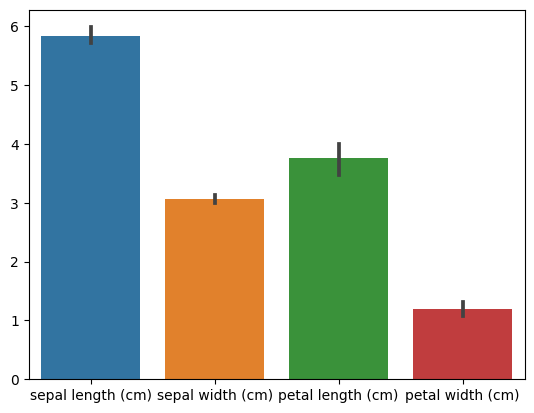

In [ ]:
sns.barplot(iris_frame)

<Axes: >

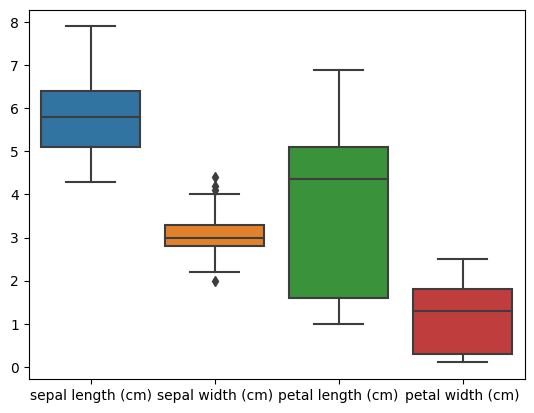

In [ ]:
sns.boxplot(iris_frame)

Коэффициент корреляции

In [ ]:
#iris_frame[['sepal length (cm)', 'sepal width (cm)']].corr()
corr_iris = iris_frame.corr().round(2)

Тепловая карта

<Axes: >

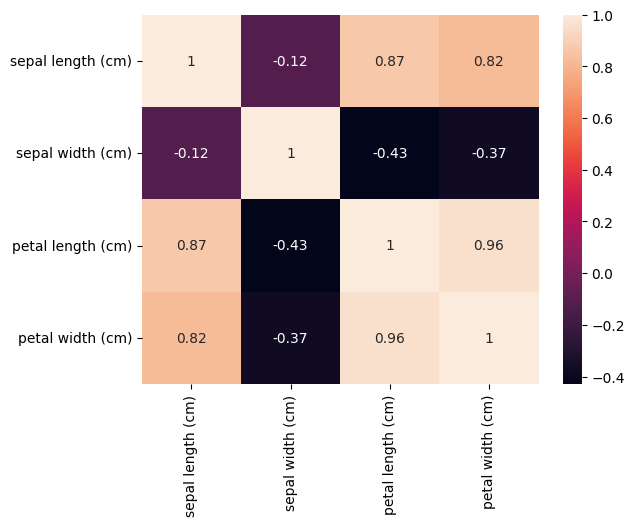

In [ ]:
sns.heatmap(corr_iris, annot = True)

Разбивка данных на тренировочные и тестовые

In [ ]:
from sklearn.model_selection import train_test_split
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Импорт линейной модели

In [ ]:
from sklearn import linear_model

Построение линейной модели

In [ ]:
reg = linear_model.LinearRegression()


Тренировка модели

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

Прогнозирование модели

In [ ]:
y_preds = reg.predict(X_test)
y_preds = abs(y_preds.round())
y_preds

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

Проверка результатов

In [ ]:
count = 0
for y_true, y_pred in zip(y_test, y_preds):
  if y_true == y_pred:
    count+=1
print(f'Предсказано корректно {count} из {len(y_test)}')
print(f'Точность предсказания = {count/len(y_test)*100}%')

Предсказано корректно 45 из 45
Точность предсказания = 100.0%


In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
y_preds

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

Алгоритм классификации на основе метода к ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Создание модели

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

Обучение модели

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1,
                     p=2, weights='uniform')

KNeighborsClassifier(n_neighbors=1)

Предсказание результатов

In [ ]:
prediction = knn.predict(X_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Проверка результатов

In [ ]:
count = 0
for y_true, y_pred in zip(y_test, prediction):
  if y_true == y_pred:
    count+=1
print(f'Предсказано корректно {count} из {len(y_test)}')
print(f'Точность предсказания = {count/len(y_test)*100}%')

Предсказано корректно 45 из 45
Точность предсказания = 100.0%
